<a href="https://colab.research.google.com/github/Himanshuengg/Semantic_Analysis_Gensim/blob/main/Sentimental__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = '/content/drive/MyDrive/data/amz_review.csv'
data_df = pd.read_csv(data)
print(data_df.head())

print("Columns in the original dataset:\n")
print(data_df.columns)
data_df.head()


                     id  ... reviews.username
0  AVqkIhwDv8e3D1O-lebb  ...          Adapter
1  AVqkIhwDv8e3D1O-lebb  ...           truman
2  AVqkIhwDv8e3D1O-lebb  ...            DaveZ
3  AVqkIhwDv8e3D1O-lebb  ...           Shacks
4  AVqkIhwDv8e3D1O-lebb  ...        explore42

[5 rows x 21 columns]
Columns in the original dataset:

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
data_df.tail()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,NaN,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,NaN,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,NaN,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-31T00:00:00Z,NaN,2015-09-01T00:00:00Z,NaN,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised to find it did not come with a...,Not worth the money,NaN,NaN,Just the Buyer
34659,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-12-23T00:00:00Z,NaN,2015-11-01T00:00:00Z,NaN,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,to spite the fact that i have nothing but good...,as with everyone else,NaN,NaN,sandi


In [ ]:
rating = data_df['reviews.rating']
print(f"The length of rating is : {len(rating)}")
review = data_df['reviews.text']
print(f"The length of review is : {len(review)}")
# combining data frame                                                                     

created_df = pd.concat([review,rating],axis=1)  #axis = 1 because we want concatination of dataframe along with column
print(f"The length of created_df is : {len(created_df)}")
created_df.head()

The length of rating is : 34660
The length of review is : 34660
The length of created_df is : 34660


,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


Number of rows per star rating:
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64


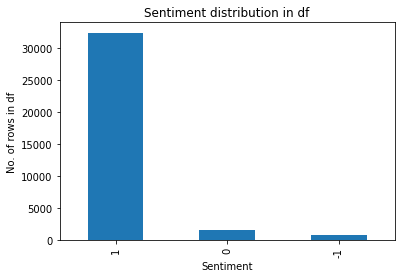

In [ ]:
import matplotlib.pyplot as plt 

print("Number of rows per star rating:")
print(created_df['reviews.rating'].value_counts())

# Function to map stars to sentiment
def map_sentiment(rating):
    if rating <= 2:
        return -1
    elif rating == 3:
        return 0
    else:
        return 1

# Mapping stars to sentiment into three categories
created_df['sentiment'] = [ map_sentiment(x) for x in created_df['reviews.rating']]

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(created_df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [ ]:
# Function to retrieve top few number of each category

def get_top_data(top_n = 5000):
    data_df_positive = created_df[created_df['sentiment'] == 1].head(top_n)
    data_df_negative = created_df[created_df['sentiment'] == -1].head(top_n)
    data_df_neutral = created_df[created_df['sentiment'] == 0].head(top_n)
    data_df_small = pd.concat([data_df_positive, data_df_negative, data_df_neutral])
    return data_df_small

# Function call to get the top 10000 from each sentiment
data_df_small = get_top_data(top_n=10000)

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each sentiment:")
print(data_df_small['sentiment'].value_counts())




print(len(data_df_small))

After segregating and taking equal number of rows for each sentiment:
 1    10000
 0     1499
-1      812
Name: sentiment, dtype: int64
12311


In [ ]:
data_df_small.head(10)

,reviews.text,reviews.rating,sentiment
0,This product so far has not disappointed. My c...,5.0,1
1,great for beginner or experienced person. Boug...,5.0,1
2,Inexpensive tablet for him to use and learn on...,5.0,1
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1
4,I bought this for my grand daughter when she c...,5.0,1
5,This amazon fire 8 inch tablet is the perfect ...,5.0,1
6,"Great for e-reading on the go, nice and light ...",4.0,1
7,"I gave this as a Christmas gift to my inlaws, ...",5.0,1
8,Great as a device to read books. I like that i...,5.0,1
9,I love ordering books and reading them with th...,5.0,1


In [ ]:
data_df_small.tail(100)

,reviews.text,reviews.rating,sentiment
30835,I bought this hoping to get a responsive andro...,3.0,0
30914,Spectrum works with Roku and smart cast app so...,3.0,0
30993,This product is no different than the fire sti...,3.0,0
31181,I have two amazon fire sticks. They were nice ...,3.0,0
31209,The media player is compact and low profile. T...,3.0,0
...,...,...,...
34447,Fire TV was just about equal to the nexus play...,3.0,0
34526,Good FireTV but remote is buggy. Other than th...,3.0,0
34566,I was a loyal Roku 3 but since I got a 4K tv I...,3.0,0
34638,This cover is a replacement for the initial co...,3.0,0


# **Preprocess text**

# **Tokenization**

In [ ]:
from gensim.utils import simple_preprocess

# Tokenize the text column to get the new column 'tokenized_text'
data_df_small['tokenized_text'] = [simple_preprocess(r, deacc=True) for line in data_df_small['reviews.text']] 
print(data_df_small['tokenized_text'].head(10))

NameError: ignored

In [ ]:
print(type(data_df_small['reviews.text']))
data_df_small.isnull().sum()                # Used for checking how much nan value our data frame contains

<class 'pandas.core.series.Series'>


reviews.text       1
reviews.rating    23
sentiment          0
dtype: int64

In [ ]:
data_df_small = data_df_small.dropna() # It will drop all the nan value from our data frame

In [ ]:
data_df_small.isnull().sum()                # Used for checking how much nan value our data frame contains

print(len(data_df_small))

12287


In [ ]:
from gensim.utils import simple_preprocess

# Tokenize the text column to get the new column 'tokenized_text'

data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in data_df_small['reviews.text']] 


print(data_df_small['tokenized_text'].head(10))

0    [this, product, so, far, has, not, disappointe...
1    [great, for, beginner, or, experienced, person...
2    [inexpensive, tablet, for, him, to, use, and, ...
3    [ve, had, my, fire, hd, two, weeks, now, and, ...
4    [bought, this, for, my, grand, daughter, when,...
5    [this, amazon, fire, inch, tablet, is, the, pe...
6    [great, for, reading, on, the, go, nice, and, ...
7    [gave, this, as, christmas, gift, to, my, inla...
8    [great, as, device, to, read, books, like, tha...
9    [love, ordering, books, and, reading, them, wi...
Name: tokenized_text, dtype: object


# **Stemming**

In [ ]:
from gensim.parsing.porter import PorterStemmer

porter_stemmer = PorterStemmer()

# Get the stemmed_tokens

data_df_small['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in data_df_small['tokenized_text'] ]
data_df_small['stemmed_tokens'].head(10)

0    [thi, product, so, far, ha, not, disappoint, m...
1    [great, for, beginn, or, experienc, person, bo...
2    [inexpens, tablet, for, him, to, us, and, lear...
3    [ve, had, my, fire, hd, two, week, now, and, l...
4    [bought, thi, for, my, grand, daughter, when, ...
5    [thi, amazon, fire, inch, tablet, is, the, per...
6    [great, for, read, on, the, go, nice, and, lig...
7    [gave, thi, as, christma, gift, to, my, inlaw,...
8    [great, as, devic, to, read, book, like, that,...
9    [love, order, book, and, read, them, with, the...
Name: stemmed_tokens, dtype: object

In [ ]:
data_df_small.head(10)

,reviews.text,reviews.rating,sentiment,tokenized_text,stemmed_tokens
0,This product so far has not disappointed. My c...,5.0,1,"[this, product, so, far, has, not, disappointe...","[thi, product, so, far, ha, not, disappoint, m..."
1,great for beginner or experienced person. Boug...,5.0,1,"[great, for, beginner, or, experienced, person...","[great, for, beginn, or, experienc, person, bo..."
2,Inexpensive tablet for him to use and learn on...,5.0,1,"[inexpensive, tablet, for, him, to, use, and, ...","[inexpens, tablet, for, him, to, us, and, lear..."
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,"[ve, had, my, fire, hd, two, weeks, now, and, ...","[ve, had, my, fire, hd, two, week, now, and, l..."
4,I bought this for my grand daughter when she c...,5.0,1,"[bought, this, for, my, grand, daughter, when,...","[bought, thi, for, my, grand, daughter, when, ..."
5,This amazon fire 8 inch tablet is the perfect ...,5.0,1,"[this, amazon, fire, inch, tablet, is, the, pe...","[thi, amazon, fire, inch, tablet, is, the, per..."
6,"Great for e-reading on the go, nice and light ...",4.0,1,"[great, for, reading, on, the, go, nice, and, ...","[great, for, read, on, the, go, nice, and, lig..."
7,"I gave this as a Christmas gift to my inlaws, ...",5.0,1,"[gave, this, as, christmas, gift, to, my, inla...","[gave, thi, as, christma, gift, to, my, inlaw,..."
8,Great as a device to read books. I like that i...,5.0,1,"[great, as, device, to, read, books, like, tha...","[great, as, devic, to, read, book, like, that,..."
9,I love ordering books and reading them with th...,5.0,1,"[love, ordering, books, and, reading, them, wi...","[love, order, book, and, read, them, with, the..."


# **Textblob library**

In [ ]:
from textblob import TextBlob

def getSubjectivity(text):     # function to get subjectivity
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):         # function to get polarity
  return TextBlob(text).sentiment.polarity

#create two new dataframe

data_df_small['subjectivity'] = data_df_small['reviews.text'].apply(getSubjectivity)   
data_df_small['polarity'] = data_df_small['reviews.text'].apply(getPolarity)

data_df_small.head()

,reviews.text,reviews.rating,sentiment,tokenized_text,stemmed_tokens,subjectivity,polarity
0,This product so far has not disappointed. My c...,5.0,1,"[this, product, so, far, has, not, disappointe...","[thi, product, so, far, ha, not, disappoint, m...",0.783333,0.325000
1,great for beginner or experienced person. Boug...,5.0,1,"[great, for, beginner, or, experienced, person...","[great, for, beginn, or, experienc, person, bo...",0.825000,0.800000
2,Inexpensive tablet for him to use and learn on...,5.0,1,"[inexpensive, tablet, for, him, to, use, and, ...","[inexpens, tablet, for, him, to, us, and, lear...",0.700000,0.600000
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,"[ve, had, my, fire, hd, two, weeks, now, and, ...","[ve, had, my, fire, hd, two, week, now, and, l...",0.731250,0.374583
4,I bought this for my grand daughter when she c...,5.0,1,"[bought, this, for, my, grand, daughter, when,...","[bought, thi, for, my, grand, daughter, when, ...",0.616226,0.368056


# **Word Embeddings**

In [ ]:
from gensim.models import Word2Vec
import time
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

start_time = time.time()
stemmed_tokens = pd.Series(data_df_small['stemmed_tokens']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))


Time taken to train word2vec model: 12.854047298431396


In [ ]:
import numpy as np
# Load the model from the model file
sg_w2v_model = w2v_model
# Unique ID of the word
print("Index of the word 'action':")
print(sg_w2v_model.wv.vocab["action"].index)
# Total number of the words 
print(len(sg_w2v_model.wv.vocab))
# Print the size of the word2vec vector for one word
print("Length of the vector generated for a word")
print(len(sg_w2v_model['action']))
# Get the mean for the vectors for an example review
print("Print the length after taking average of all word vectors in a sentence:")
print(np.mean([sg_w2v_model[token] for token in data_df_small['stemmed_tokens'][0]], axis=0))

Index of the word 'action':
1513
5578
Length of the vector generated for a word
1000
Print the length after taking average of all word vectors in a sentence:
[ 2.23060157e-02 -5.20291775e-02  1.19065605e-02 -2.32842155e-02
  6.37941882e-02 -6.09451756e-02  1.19124003e-01  3.14073600e-02
 -6.38206303e-02 -1.89707223e-02  8.15741066e-03  7.35998973e-02
 -7.43359178e-02  1.16322674e-01 -6.92720264e-02  3.45830955e-02
 -1.11376218e-01 -3.66939828e-02 -6.40640175e-03 -5.56678958e-02
 -7.28772581e-02 -1.11654676e-01  2.81186798e-03  5.78499585e-03
 -5.96233585e-04  7.30213523e-02  4.07712795e-02 -6.18733354e-02
 -5.66467978e-02  2.87208986e-02 -3.38066593e-02 -2.80248802e-02
 -5.80225177e-02 -8.16881284e-02  9.51449387e-03  7.28677660e-02
  7.66486824e-02 -7.09299073e-02 -1.10689685e-01  2.93844566e-03
 -1.22259699e-01  1.21566825e-01  3.06922030e-02  1.22742176e-01
  4.89582680e-02 -7.85929337e-02 -6.59811199e-02 -3.75776961e-02
 -9.44420919e-02  2.74138544e-02 -6.43841922e-02  3.69701460e-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


# **Generating Word2Vec Vectors**

In [ ]:
# Store the vectors for train data in following file
word2vec_filename = '/content/drive/MyDrive/data' + 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([sg_w2v_model[token] for token in row['stemmed_tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

NameError: ignored

In [ ]:

import time

#Import the DecisionTreeeClassifier
from sklearn.tree import DecisionTreeClassifier

# Load from the filename
word2vec_df = sg_w2v_model

#Initialize the model
clf_decision_word2vec = DecisionTreeClassifier()

start_time = time.time()
# Fit the model

clf_decision_word2vec.fit(word2vec_df, Y_train['sentiment'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

NameError: ignored